In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


from sklearn import metrics

In [2]:
df = pd.read_csv('Regression_StoreSales.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.074402,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.064299,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
14199,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
14200,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
14201,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Small,Tier 2,Supermarket Type1,NaN
14202,FDJ26,15.3,Regular,0.064709,Canned,214.6218,OUT017,2007,Small,Tier 2,Supermarket Type1,NaN
14203,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,Small,Tier 2,Supermarket Type1,NaN


In [4]:
df2 = df.copy()

In [5]:
df.shape

(14204, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [7]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.793380,0.070301,141.004977,1997.830681,2181.288914
std,4.651716,0.048621,62.086938,8.371664,1706.499616
min,4.555000,0.003575,31.290000,1985.000000,33.290000
25%,8.710000,0.033143,94.012000,1987.000000,834.247400
50%,12.600000,0.062347,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [8]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

### **Preprocessing.**

In [9]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

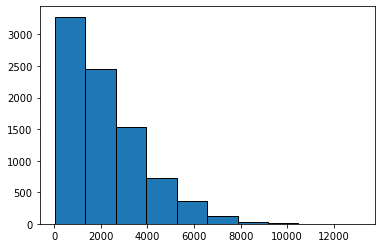

In [10]:
plt.hist(df['Item_Outlet_Sales'], edgecolor='black');

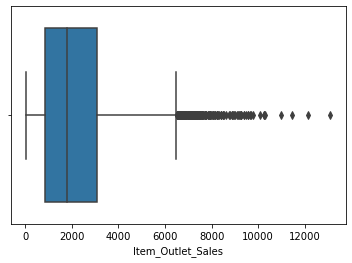

In [11]:
sns.boxplot(df['Item_Outlet_Sales']);

In [12]:
df['Item_Outlet_Sales']=df['Item_Outlet_Sales'].fillna(df['Item_Outlet_Sales'].median()) #filling  nan values with median for 

In [13]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### EDA

univariate

In [14]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.074402,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.064299,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


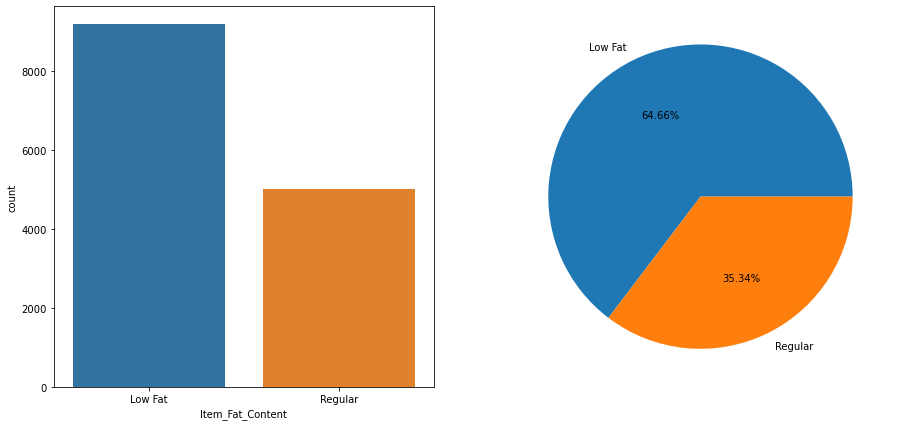

In [15]:
fig,ax = plt.subplots(1,2,figsize=(15,7))
sns.countplot(df['Item_Fat_Content'], ax=ax[0])
data = df['Item_Fat_Content'].value_counts()
plt.pie(x=data, autopct='%0.2f%%', labels=data.index)
plt.show()

- 64% of items are low fat items.

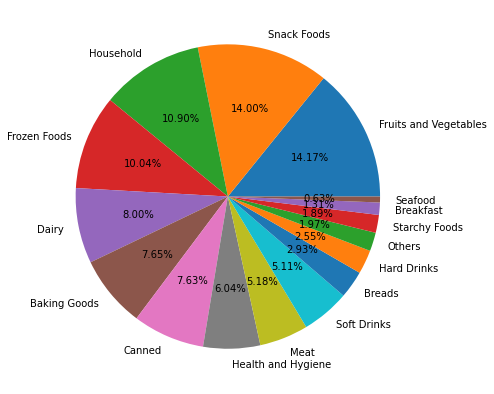

In [16]:
plt.figure(figsize=(15,7))
data = df['Item_Type'].value_counts()
plt.pie(x=data, autopct='%0.2f%%', labels=data.index)
plt.show()

- 14.17% are fruits and vegetables.
- 14% are snack foods.

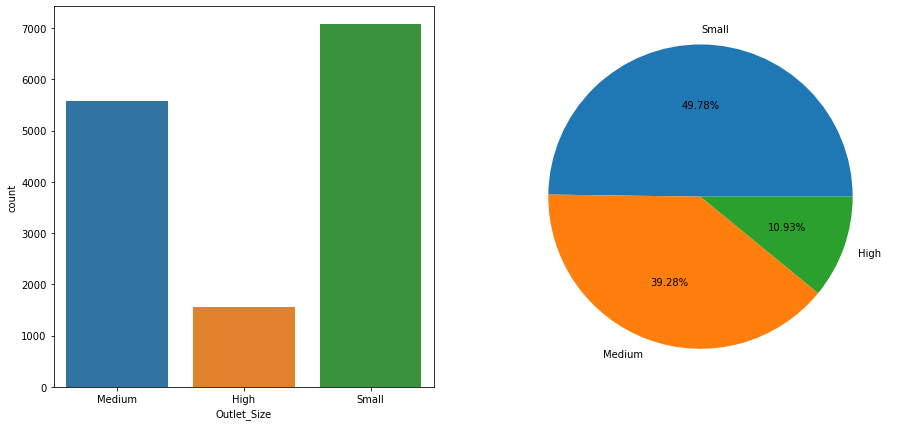

In [17]:
fig,ax = plt.subplots(1,2,figsize=(15,7))
sns.countplot(df['Outlet_Size'], ax=ax[0])
data = df['Outlet_Size'].value_counts()
plt.pie(x=data, autopct='%0.2f%%', labels=data.index)
plt.show()

- Half of the items are of small outlet size.

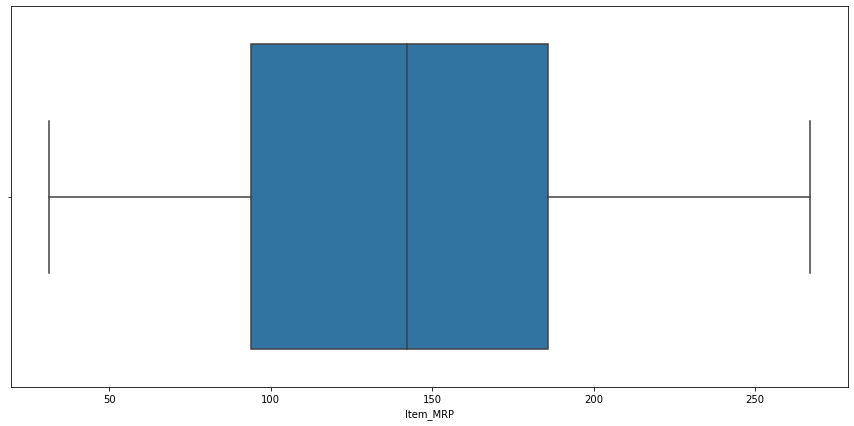

In [18]:
plt.figure(figsize=(15,7))
sns.boxplot(df['Item_MRP'])
plt.show()

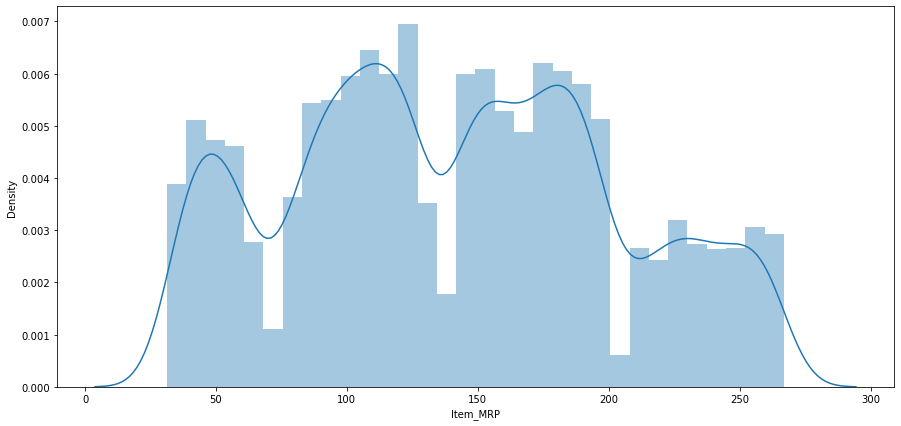

In [19]:
plt.figure(figsize=(15,7))
sns.distplot(df['Item_MRP'])
plt.show()

- Most of items MRP is comes between 90 to 180.

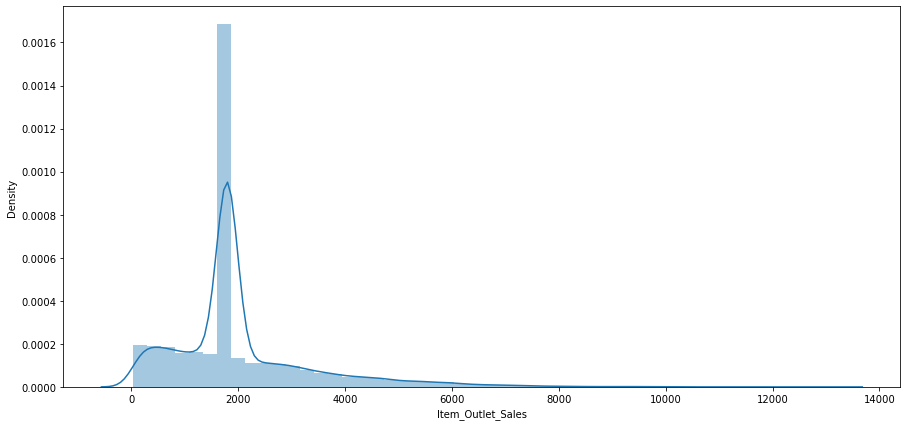

In [20]:
plt.figure(figsize=(15,7))
sns.distplot(df['Item_Outlet_Sales'])
plt.show()

- After filling nan values with median most of the data lies nearer to median.

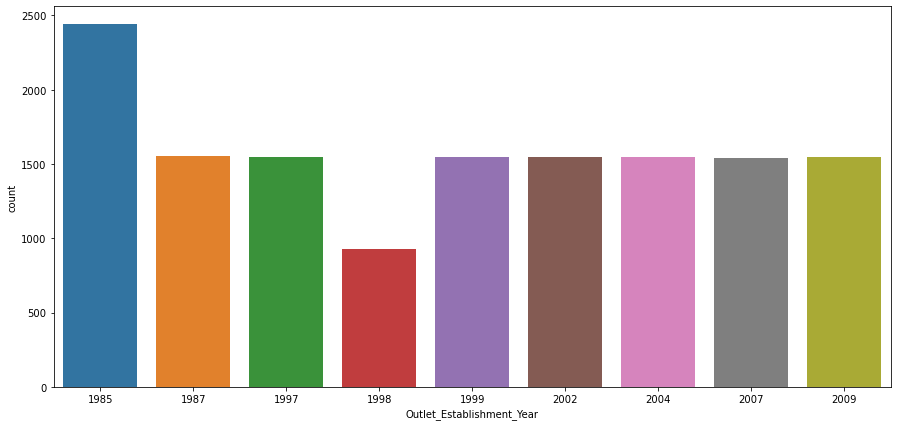

In [22]:
plt.figure(figsize=(15,7))
sns.countplot(df['Outlet_Establishment_Year'])
plt.show()

### **Bivariate Analysis**

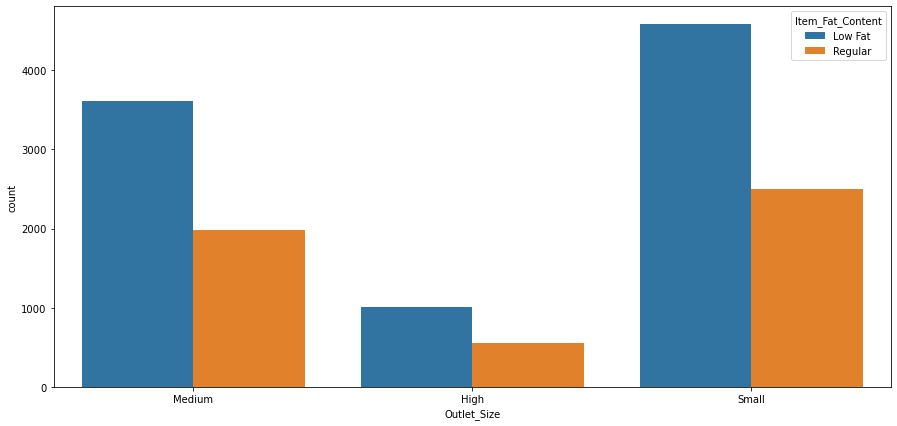

In [23]:
plt.figure(figsize=(15,7))
sns.countplot(df['Outlet_Size'], hue=df['Item_Fat_Content'])
plt.show()

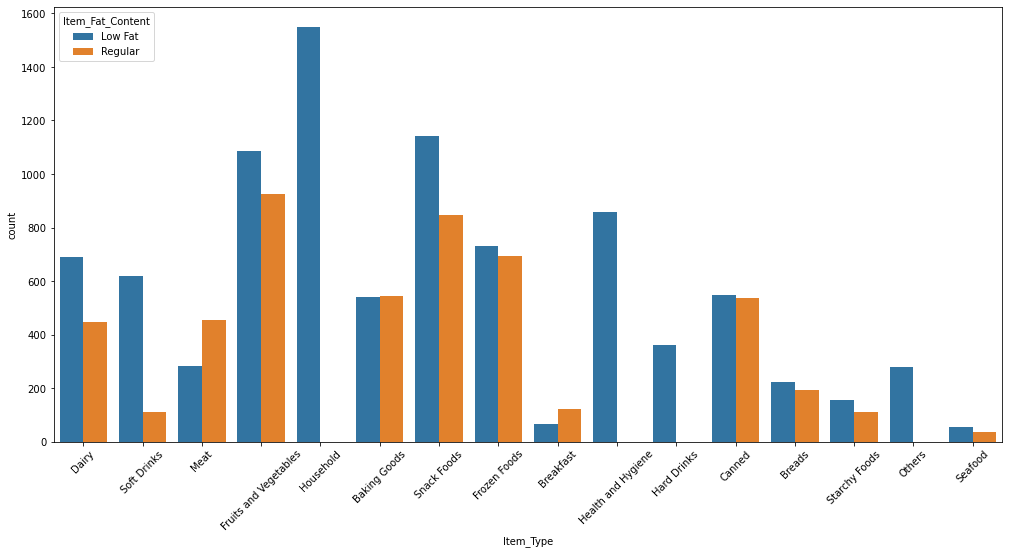

In [24]:
plt.figure(figsize=(17,8))
sns.countplot(df['Item_Type'], hue=df['Item_Fat_Content'])
plt.xticks(rotation=45)
plt.show()

- In houshold item type there is no regular fat content. 

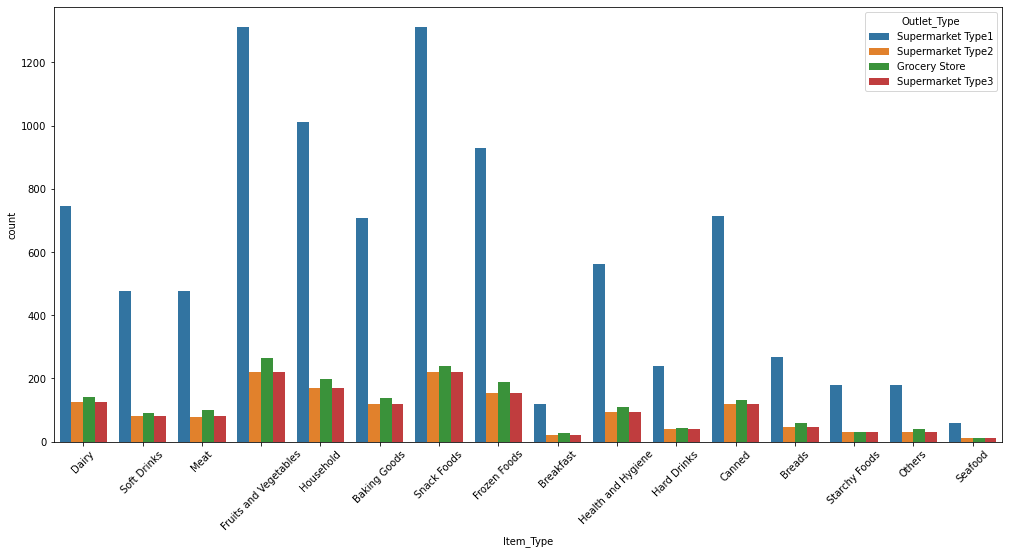

In [25]:
plt.figure(figsize=(17,8))
sns.countplot(df['Item_Type'], hue=df['Outlet_Type'])
plt.xticks(rotation=45)
plt.show()

In [26]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.074402,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.064299,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


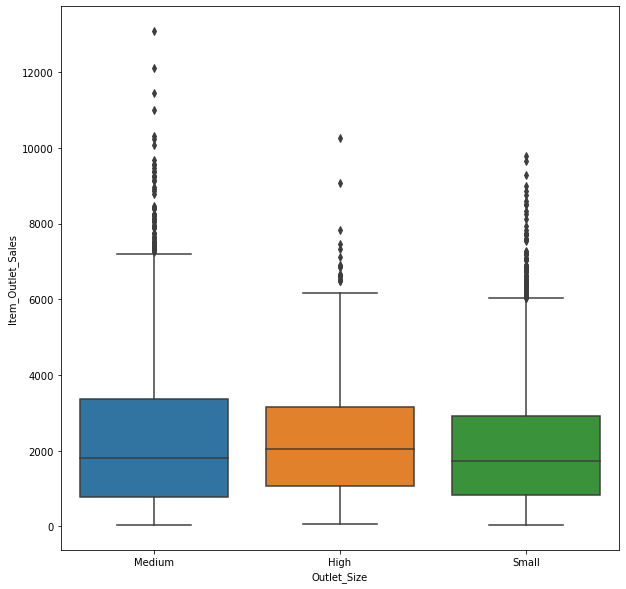

In [76]:
plt.figure(figsize=(10,10))
sns.boxplot(x=df2['Outlet_Size'],y=df2['Item_Outlet_Sales'])
plt.show()

#### - Medium and high outlet size has more range of sales.

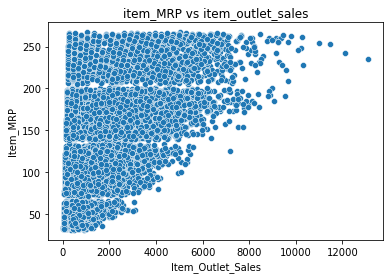

In [100]:
sns.scatterplot(df2['Item_Outlet_Sales'], df['Item_MRP'])
plt.title('item_MRP  vs  item_outlet_sales')
plt.show()

### 
- For value less than 100 sales is very low.
- for values between 100 to 250 sales is better.

In [102]:
high_sale = df2[df2['Item_Outlet_Sales']>=8000]

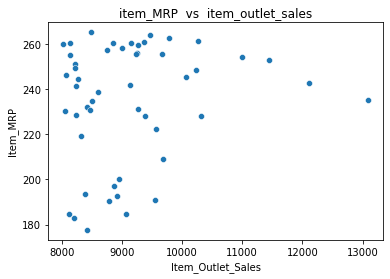

In [103]:
sns.scatterplot(high_sale['Item_Outlet_Sales'], high_sale['Item_MRP'])
plt.title('item_MRP  vs  item_outlet_sales')
plt.show()

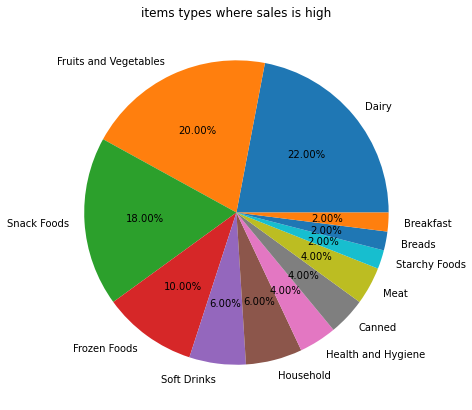

In [105]:
plt.figure(figsize=(15,7))
data = high_sale['Item_Type'].value_counts()
plt.pie(x=data, autopct='%0.2f%%', labels=data.index)
plt.title('items types where sales is high')
plt.show()

#### - dairy, fruits and veggies, and snack items contributing more to higher sales

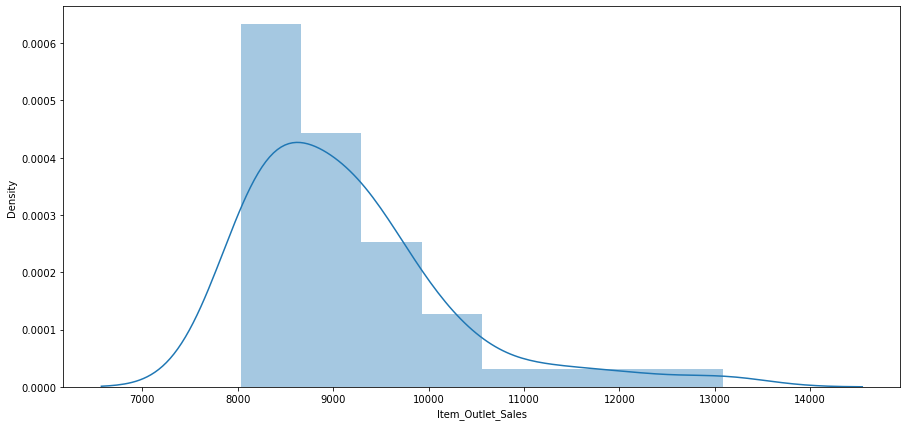

In [107]:
plt.figure(figsize=(15,7))
sns.distplot(high_sale['Item_Outlet_Sales'])
plt.show()

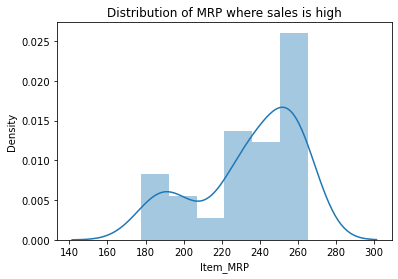

In [109]:

sns.distplot(high_sale['Item_MRP'])
plt.title('Distribution of MRP where sales is high')
plt.show()

In [110]:
################################################################################################################################

### Label Encoding

In [28]:
col = ['Item_Identifier', 'Item_Fat_Content','Item_Type', 'Outlet_Identifier','Outlet_Size', 'Outlet_Location_Type','Outlet_Type']
 
le = LabelEncoder()
for i in col:
    
      df[i] = le.fit_transform(df[i])

In [29]:
df.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700


### Scaling

In [30]:
scaler = StandardScaler()
sc_df=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
sc_df.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,-1.388320,-0.751014,-0.739212,-1.115880,-0.766467,1.752511,1.507764,0.139681,-0.575144,-1.369286,-0.252702,1.279534
1,-1.717498,-1.477653,1.352792,-1.049426,1.606957,-1.493696,-0.607145,1.334228,-0.575144,1.091566,1.002766,-1.185539
2,-0.262885,1.011839,-0.739212,-1.101219,0.657587,0.009874,1.507764,0.139681,-0.575144,-1.369286,-0.252702,0.052981


Spliting

In [31]:
x = sc_df.drop(columns=['Item_Outlet_Sales','Item_Identifier','Outlet_Establishment_Year','Outlet_Identifier'], axis=1)
y = sc_df['Item_Outlet_Sales']

x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.8, random_state=42)

In [32]:
x_train.shape

(11363, 8)

In [33]:
y_train.shape

(11363,)

### Model Training:- Linear Regression.

In [34]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [35]:
lr_r2=lr.score(x_train,y_train)
lr_r2

0.29748314617878047

In [36]:
y_pred=lr.predict(x_test)  #prediction on testing data
y_pred

array([ 0.52637915,  0.48852359,  0.28842478, ..., -1.26595327,
       -0.12541612, -0.00552509])

In [37]:
lr_te_r2 = lr.score(x_test,y_test)
lr_te_r2                                       # test data prediction score

0.2816017767024933

In [38]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)


print("mse:",mse)
print("mae:",mae)
print("rmse:",rmse)

mse: 0.657829032977293
mae: 0.6041494122259462
rmse: 0.8110666020600854


### Model building DTR

In [39]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)

DecisionTreeRegressor()

In [40]:
# check training performance

train_r2 = dtr.score(x_train, y_train)
train_r2

1.0

In [41]:
# check testing performance

test_r2 = dtr.score(x_test, y_test)
test_r2

-0.4010184668706678

In [42]:
dtr_pred = dtr.predict(x_test)
dtr_pred

array([ 2.27423918,  2.7623675 , -0.17388138, ..., -1.42087721,
        0.83977017,  0.14522191])

In [43]:
mse2 = mean_squared_error(y_test, dtr_pred)
mae2 = mean_absolute_error(y_test, dtr_pred)
rmse2 = mean_squared_error(y_test, dtr_pred, squared=False)

print("mse:",mse2)
print("mae:",mae2)
print("rmse:",rmse2)

mse: 1.2828965793017988
mae: 0.7548139631178765
rmse: 1.1326502457960264


### conclusion:
- Big difference in train performance and test performance

### Model building  randomforest regressor

In [44]:
from sklearn.ensemble import RandomForestRegressor

brf = RandomForestRegressor(max_depth=4,oob_score=True)

brf.fit(x_train, y_train)

RandomForestRegressor(max_depth=4, oob_score=True)

In [45]:
# check training performance

brf_train_r2 = brf.score(x_train, y_train)
brf_train_r2

0.3561155503175316

In [46]:
# check testing performance

brf_test_r2 = brf.score(x_test, y_test)
brf_test_r2

0.3426231295862894

In [47]:
from sklearn.model_selection import cross_val_score,KFold

kf = KFold()
kf

KFold(n_splits=5, random_state=None, shuffle=False)

In [48]:
brf_mse = cross_val_score(brf, x, y, cv=5, scoring='neg_mean_squared_error')
-brf_mse.mean()

0.7965462350378336

In [49]:
brf_mae = cross_val_score(brf, x, y, cv=5, scoring='neg_mean_absolute_error')
-brf_mae.mean()

0.6644695494490922

In [50]:
import math
brf_rmse = math.sqrt(mse)
brf_rmse

0.8110666020600854

### Model building:-  Adaboost

In [51]:
from sklearn.ensemble import AdaBoostRegressor

ad = AdaBoostRegressor()

ad.fit(x_train,y_train)

AdaBoostRegressor()

In [52]:
# checking training performance
ad_tr = ad.score(x_train, y_train)
ad_tr

0.22879419029334913

In [53]:
# check testing performance
ad_te = ad.score(x_test, y_test)
ad_te

0.16592692632140327

In [54]:
ad_mse = cross_val_score(brf, x, y, cv=5, scoring='neg_mean_squared_error')
-ad_mse.mean()

0.7971073494911296

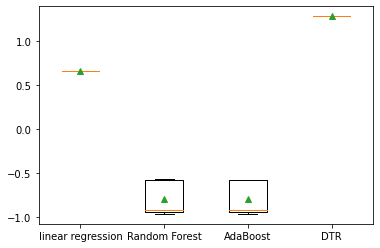

In [55]:
name = []
result = []

name.append('linear regression')
result.append(mse)

name.append('Random Forest')
result.append(brf_mse)

name.append('AdaBoost')
result.append(ad_mse)

name.append('DTR')
result.append(mse2)


plt.boxplot(result,labels=name,showmeans=True);

In [56]:
z =pd.DataFrame({'model':['Linear regression', 'dtr','bagging with rf', 'Adaboost'],"Training performance":[0.29,1,0.35,0.081], 'mse':[0.65,1.26,0.79,0.79]})
z

,model,Training performance,mse
0,Linear regression,0.290,0.65
1,dtr,1.000,1.26
2,bagging with rf,0.350,0.79
3,Adaboost,0.081,0.79


#### Selecting random forest

In [87]:
x1 = df.drop(columns=['Item_Outlet_Sales'], axis=1)
y1 = df['Item_Outlet_Sales']

x_train1, x_test1, y_train1, y_test1 = train_test_split(x1,y1, train_size=0.8, random_state=42)

In [88]:
train, test = train_test_split(df2, train_size=0.8, random_state=42)

In [89]:
model = RandomForestRegressor()
model.fit(x_train1, y_train1)

RandomForestRegressor()

In [90]:
pred = model.predict(x_test1)
pred

array([3264.477322, 3506.375778, 2455.417136, ...,  993.067332,
       2388.430998, 1725.034536])

In [91]:
submission = pd.DataFrame()
submission['id'] = test['Item_Identifier']
submission['sales'] = pred


In [92]:
submission

,id,sales
14090,FDT51,3264.477322
4098,FDB27,3506.375778
13929,NCB07,2455.417136
7562,FDY39,3371.977390
12189,DRA59,2630.056476
...,...,...
9577,FDM32,1205.876986
2089,FDM15,1926.825200
13494,NCM18,993.067332
1801,NCV17,2388.430998


In [93]:
submission.to_csv('soham_project_2_submission.csv', index=False)

### Test on realtime Data

In [94]:
x_test1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
14090,959,11.650,1,0.010866,10,111.4544,5,1985,1,2,3
4098,209,7.575,0,0.055476,4,196.8768,9,1999,1,0,1
13929,1275,19.200,0,0.077493,9,197.0110,6,2004,2,1,1
7562,1198,5.305,1,0.074402,10,182.0608,5,1985,1,2,3
12189,2,8.270,1,0.128187,14,184.3924,7,2002,2,1,1


In [95]:
x_test1.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [96]:
x_test1.iloc[0]

Item_Identifier               959.000000
Item_Weight                    11.650000
Item_Fat_Content                1.000000
Item_Visibility                 0.010866
Item_Type                      10.000000
Item_MRP                      111.454400
Outlet_Identifier               5.000000
Outlet_Establishment_Year    1985.000000
Outlet_Size                     1.000000
Outlet_Location_Type            2.000000
Outlet_Type                     3.000000
Name: 14090, dtype: float64

In [97]:
model.predict([x_test1.iloc[0]])

array([3264.477322])

In [98]:
model.predict([[209.,15.0,1.0,1.,12.,200.,5.,1999.,1.,3.,8.]])

array([3626.872262])

In [99]:
model.predict([[203.,17.0,2.0,1.,15.,220.,4.,2009.,2.,4.,3.]])

array([3198.310118])

### conclusion:
- Like the above we can put the data for testing and predict the output.

### Conclusion:
    
- Tried four different types of machine learning algorithms.
- From four DTR was giving overfitting results hence skiped it.
- Bagging with RandomForest is providing better performance hence used it for further prediction of sales.
- Used the model and predicted the results for test data.

### Business conclusion:

- Half of the store size is small, owner can increase the size to medium or high to store more items with more storage he can store more demanding products in better quantities.
- From last 10 years no addition to establishment for outlets, owner can establish more.
- Seafoods and other item types have very low demand, owner can give discount on those items or can reduce expense on that    types and convert to more demanding types.
- Dairy products, fruits and veggies and snack food contributing more for higher sales.
- For MRP more than 250 , there are very less consumers, owner can cut his expenses on high price items and used it for purchasing more lower price items.
- Can sale items of price between 180 to 250.


In [111]:
################################################################################################################################